In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [1]:
# Loading the dataset from the source link
url = "https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/Fraud_Detection_Dataset.csv"


In [3]:
#Reviewing the data
data = pd.read_csv(url)
data.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date and Time,Merchant Category,Location,Previous Transaction Amount,Time Since Last Transaction,Device Type,Fraud
0,1,4174,659.297095,2023-01-01 00:00:00,Clothing,Los Angeles,579.323704,481.377516,desktop,No
1,2,4507,474.046452,2023-01-01 00:01:00,Dining,Houston,407.220271,1159.211075,desktop,No
2,3,1860,498.819570,2023-01-01 00:02:00,Dining,San Francisco,265.583605,720.677284,desktop,No
3,4,2294,744.199592,2023-01-01 00:03:00,Electronics,Los Angeles,1097.259081,1.000000,mobile,No
4,5,2130,279.181247,2023-01-01 00:04:00,Electronics,Los Angeles,238.389682,1378.958721,mobile,No


In [7]:
# Summary statistics for more info
data.describe()


,Transaction ID,Customer ID,Transaction Amount,Previous Transaction Amount,Time Since Last Transaction
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,3010.561100,559.865608,461.410984,677.040726
std,2886.89568,1152.371939,399.984400,334.582413,432.386769
min,1.00000,1000.000000,1.000000,0.000000,1.000000
25%,2500.75000,2001.750000,262.969956,181.109688,295.523894
50%,5000.50000,3004.000000,522.370941,404.367010,653.143168
75%,7500.25000,4010.000000,788.415931,676.079655,1048.479972
max,10000.00000,4999.000000,2953.394492,1500.000000,1694.715674


In [8]:
#Getting the summary statistics of the dataset
print(data.describe())


       Transaction ID   Customer ID  Transaction Amount  \
count     10000.00000  10000.000000        10000.000000   
mean       5000.50000   3010.561100          559.865608   
std        2886.89568   1152.371939          399.984400   
min           1.00000   1000.000000            1.000000   
25%        2500.75000   2001.750000          262.969956   
50%        5000.50000   3004.000000          522.370941   
75%        7500.25000   4010.000000          788.415931   
max       10000.00000   4999.000000         2953.394492   

       Previous Transaction Amount  Time Since Last Transaction  
count                 10000.000000                 10000.000000  
mean                    461.410984                   677.040726  
std                     334.582413                   432.386769  
min                       0.000000                     1.000000  
25%                     181.109688                   295.523894  
50%                     404.367010                   653.143168  
75%   

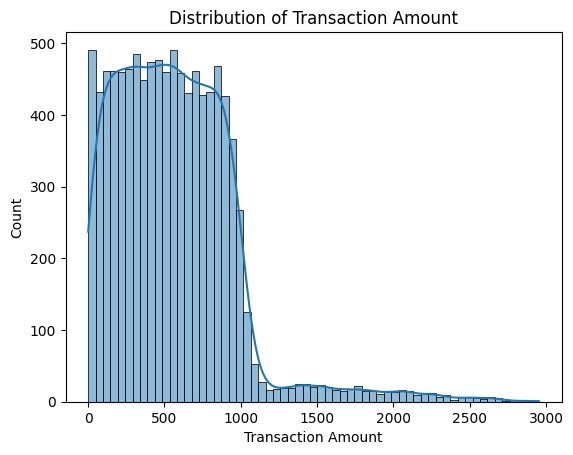

In [9]:
# Plot the distribution of the Transaction Amount
sns.histplot(data['Transaction Amount'], kde=True)
plt.title('Distribution of Transaction Amount')
plt.show()


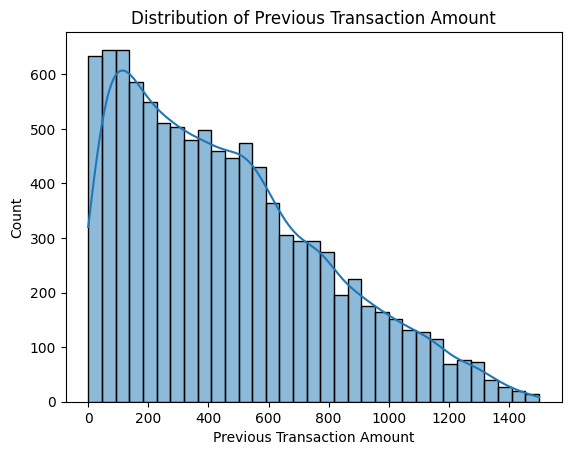

In [11]:
# Plot the distribution of the Previous Transaction Amount
sns.histplot(data['Previous Transaction Amount'], kde=True)
plt.title('Distribution of Previous Transaction Amount')
plt.show()



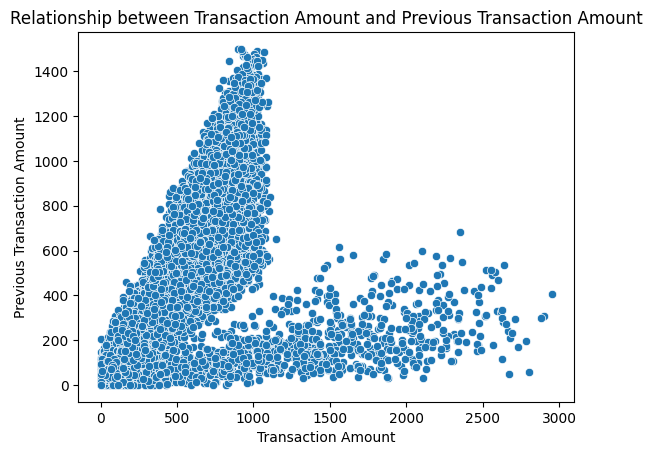

In [18]:

# Plot the relationship between Transaction Amount and Previous Transaction Amount
sns.scatterplot(x='Transaction Amount', y='Previous Transaction Amount', data=data)
plt.title('Relationship between Transaction Amount and Previous Transaction Amount')
plt.show()


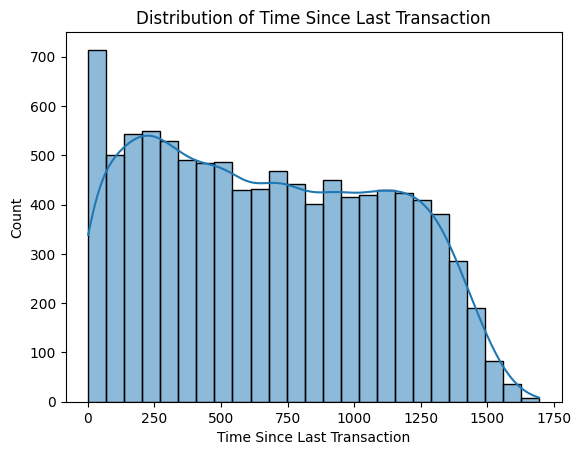

In [19]:
# Plot the distribution of the Time Since Last Transaction
sns.histplot(data['Time Since Last Transaction'], kde=True)
plt.title('Distribution of Time Since Last Transaction')
plt.show()


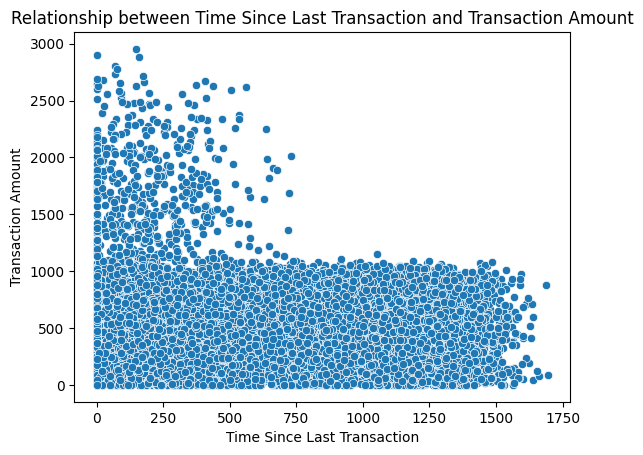

In [20]:
#Plot the relationship between Time Since Last Transaction and Transaction Amount
sns.scatterplot(x='Time Since Last Transaction', y='Transaction Amount', data=data)
plt.title('Relationship between Time Since Last Transaction and Transaction Amount')
plt.show()


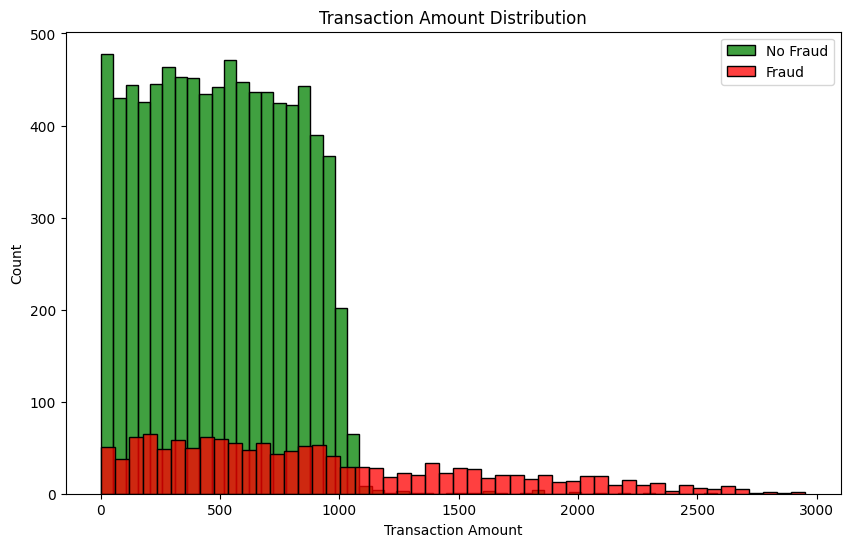

In [22]:
# Plot the distribution of the transaction amount
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Fraud'] == 'No']['Transaction Amount'], bins=50, color='green', label='No Fraud')
sns.histplot(data[data['Fraud'] == 'Yes']['Transaction Amount'], bins=50, color='red', label='Fraud')
plt.legend()
plt.title('Transaction Amount Distribution')
plt.show()

<Axes: title={'center': 'Device Type Distribution'}, xlabel='Device Type', ylabel='Frequency'>

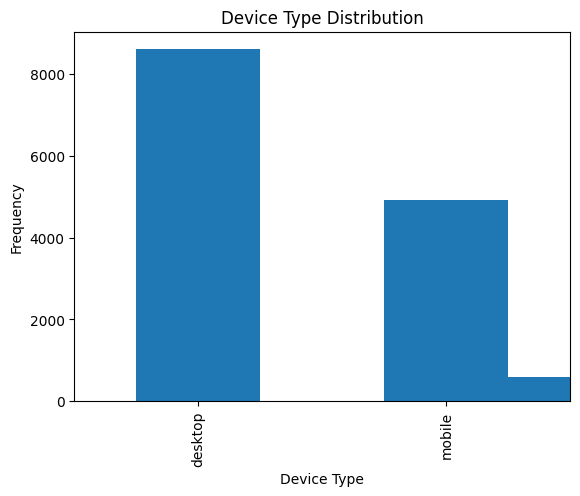

In [23]:
# Distribution of fraud and non-fraud transactions
data['Fraud'].value_counts().plot(kind='bar')

# Transaction amount distribution
data['Transaction Amount'].plot(kind='hist', bins=50, title='Transaction Amount Distribution')

# Merchant category distribution
data['Merchant Category'].value_counts().plot(kind='bar', title='Merchant Category Distribution')

# Device type distribution
data['Device Type'].value_counts().plot(kind='bar', title='Device Type Distribution')


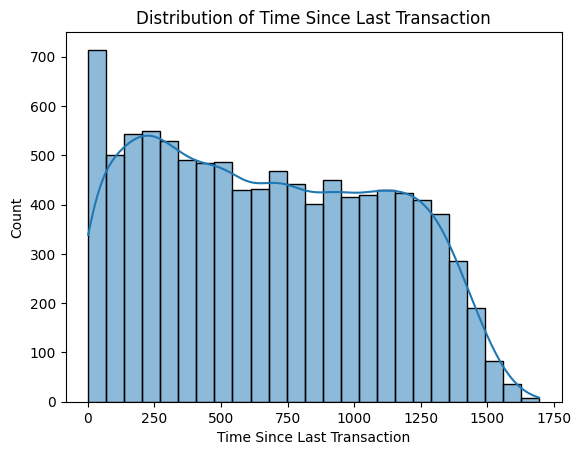

In [25]:
#Plot the distribution of the Time Since Last Transaction
sns.histplot(data['Time Since Last Transaction'], kde=True)
plt.title('Distribution of Time Since Last Transaction')
plt.show()



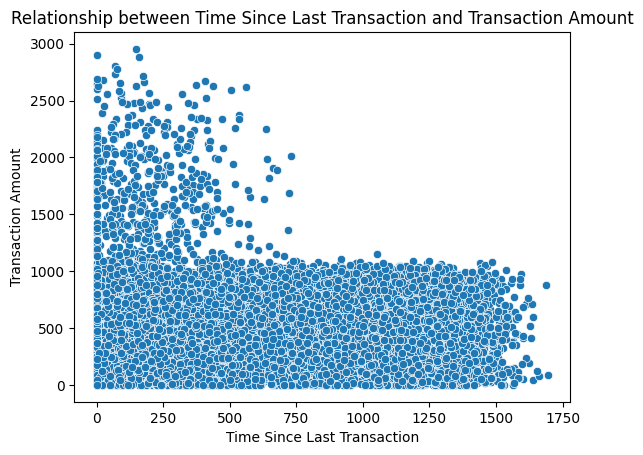

In [26]:
# Plot the relationship between Time Since Last Transaction and Transaction Amount
sns.scatterplot(x='Time Since Last Transaction', y='Transaction Amount', data=data)
plt.title('Relationship between Time Since Last Transaction and Transaction Amount')
plt.show()


Preparing the data for modelling

In [27]:
# One-hot encodeing the categorical variables
data = pd.get_dummies(data, columns=['Merchant Category', 'Location', 'Device Type'])

In [29]:
# Scaling the numerical variables using standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['Transaction Amount', 'Previous Transaction Amount', 'Time Since Last Transaction']] = scaler.fit_transform(data[['Transaction Amount', 'Previous Transaction Amount', 'Time Since Last Transaction']])


In [30]:
# Creating new features
data['Transaction Amount Ratio'] = data['Transaction Amount'] / data['Previous Transaction Amount']
data['Time Since Last Transaction Ratio'] = data['Time Since Last Transaction'] / data['Previous Transaction Amount']


Build a model to predict the output variable.


In [31]:
# Spliting the data into training and testing sets
from sklearn.model_selection import train_test_split
X = data.drop('Fraud', axis=1)
y = data['Fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [42]:
# Train the models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



In [43]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

In [45]:
#for name, model in models.items():
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


ValueError: could not convert string to float: '2023-01-07 10:14:00'